In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_llr_individual(config):

    plt.figure(figsize=(7,6))

    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}"
    fig_name = f"llr_fit_individual_{config['sample_name']}_range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}"

    os.makedirs(f"{config['plot_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/",exist_ok=True)
    save_dir = f"{config['plot_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/"
    all_parameter_points_to_plot = [] 

    for i in range(5):
    
      estimator_number = i + 1
      dir =  load_dir + f"/estimator_{i}_data.npz"

      data = np.load(dir)

      parameter_grid = data['parameter_grid']
      llr_kin = data['llr_kin']
      llr_rate = data['llr_rate']
      index_best_point = data['index_best_point']

      rescaled_log_r = llr_kin+llr_rate
      rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    

      plt.plot(parameter_grid,rescaled_log_r,linewidth=lw, label=f"Estimator {estimator_number}")    

      if args.CL: 
            # Store parameter points for this estimator
            parameter_points_to_plot = [parameter_grid[i] for i, llr_val in enumerate(rescaled_log_r) if llr_val < 3.28]
            all_parameter_points_to_plot.extend(parameter_points_to_plot)

    if args.CL:

      fig_name = f"{fig_name}_CL.pdf"
      # Set x-axis and y-axis limits using all parameter points
      abs_parameter_points = [abs(point) for point in all_parameter_points_to_plot]
      plt.axhline(y=1.64,linestyle='-.',linewidth=lw,color='grey',label='95%CL')
      plt.axhline(y=1.0,linestyle=':',linewidth=lw,color='grey',label='68%CL')
      plt.xlim(-max(abs_parameter_points), max(abs_parameter_points))
      plt.ylim(-1, 3.28)

    else:
      fig_name = f"{fig_name}.pdf"

    plt.xlabel(r"$c_{H\tildeW}$")
    plt.ylabel(r"$q'(\theta)$") 
    plt.legend( title=  title)
    plt.savefig(f"{save_dir}/{fig_name}")

def plot_llr_ensemble(config):
    
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}"

    fig_name = f"llr_fit_ensemble_{config['sample_name']}_range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}"

    os.makedirs(f"{config['plot_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/",exist_ok=True)
    save_dir = f"{config['plot_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/"
    
    data = np.load(f"{load_dir}/ensemble_data.npz")

    parameter_grid = data['parameter_grid']
    llr_kin = data['llr_kin']
    llr_rate = data['llr_rate']
    index_best_point = data['index_best_point']

    if config['limits']['method'] == 'sally':
      title = 'SALLY'
      color = 'mediumvioletred'

    if config['limits']['method'] == 'alices':
      title = 'ALICES'
      color = 'blue'

    if config['limits']['method'] == 'alice':
      title = 'ALICE'
      color = 'darkgreen'


    plt.figure(figsize=(7, 6))

    rescaled_log_r = llr_kin+llr_rate
    rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    

    # std = calculate_std(config)
    # std = np.squeeze(std)
    parameter_grid = np.squeeze(parameter_grid)
 

    plt.plot(parameter_grid,rescaled_log_r,lw=1.5, color = color, label = title)    
    # plt.fill_between(parameter_grid, rescaled_log_r - std, rescaled_log_r + std, color=color, alpha=0.1)



    if args.CL:
      fig_name = f"{fig_name}_CL.pdf"
      # Set x-axis and y-axis limits using all parameter points
      parameter_points_to_plot=[parameter_grid[i] for i,llr_val in enumerate(rescaled_log_r) if llr_val<3.28]
      plt.axhline(y=1.64,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
      plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
      plt.xlim(-max(abs(parameter_points_to_plot[0]),abs(parameter_points_to_plot[-1])),+max(abs(parameter_points_to_plot[0]),abs(parameter_points_to_plot[-1])))
      plt.ylim(-1, 3.28)

    else:
      fig_name = f"{fig_name}.pdf"

    plt.xlabel(r"$c_{H\tildeW}$")
    plt.ylabel(r"$q'(\theta)$") 
    plt.legend()
    plt.savefig(f"{save_dir}/{fig_name}")


def calculate_std(load_dir):

    predictions = []

    for i in range(5):
    
      estimator_number = i + 1
      dir =  load_dir + f"/estimator_{i}_data.npz"

      data = np.load(dir)

      parameter_grid = data['parameter_grid']
      llr_kin = data['llr_kin']
      llr_rate = data['llr_rate']
      index_best_point = data['index_best_point']

      rescaled_log_r = llr_kin+llr_rate
      rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    
      predictions.append(rescaled_log_r)

    std_deviation = np.std(predictions, axis=0)

    return std_deviation

# Detector-level with Pythia and Delphes: CP-odd

## Alices Signal Only vs Signal + backgrounds 

(-1.0, 1.0)

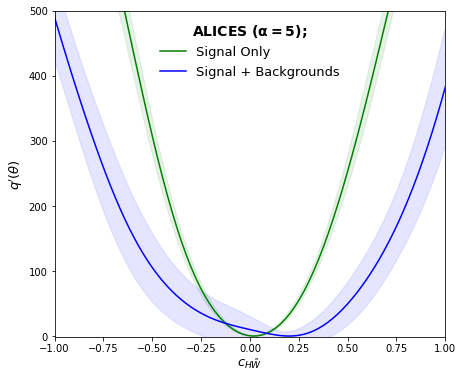

In [4]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)};$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## Alices Signal Only vs Signal + backgrounds zoom in

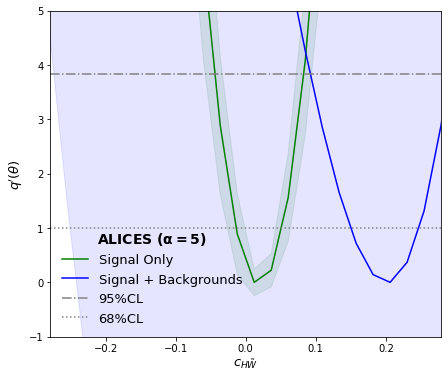

In [5]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


## Alice Signal Only vs Signal + backgrounds 

(-1.0, 1.0)

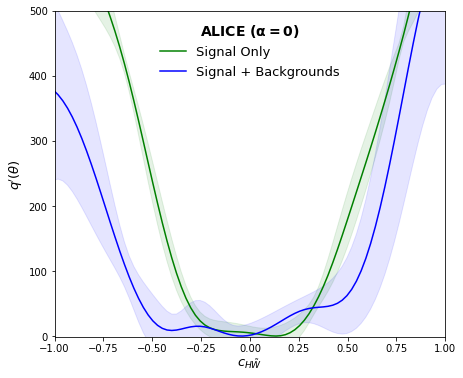

In [6]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## Alices Signal Only vs Signal + backgrounds zoom in

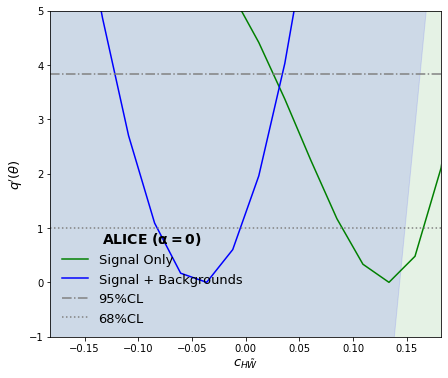

In [7]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


## Alices Signal Only vs Signal + backgrounds - angular observables

(-1.0, 1.0)

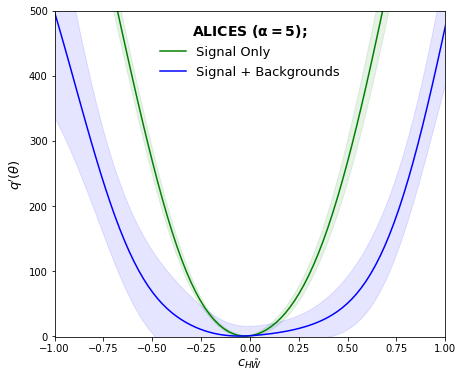

In [8]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)};$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## Alices Signal Only vs Signal + backgrounds - angular observables - zoom in 

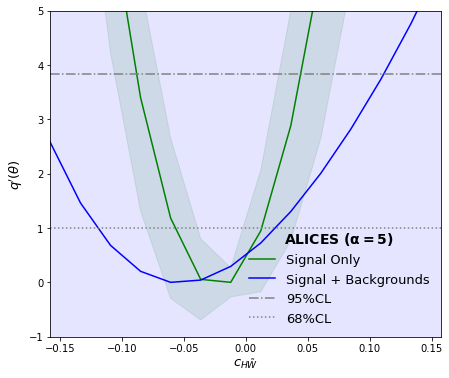

In [9]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "lower right", fontsize = 13)

## Alice Signal Only vs Signal + backgrounds - angular observables

(-1.0, 1.0)

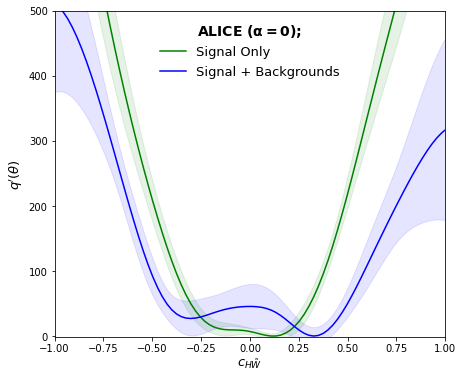

In [10]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)};$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## Alices Signal Only vs Signal + backgrounds - angular observables - zoom in 

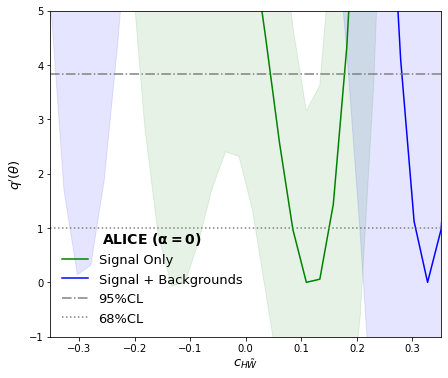

In [11]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

## SALLY Signal Only vs Signal + backgrounds

(-1.0, 1.0)

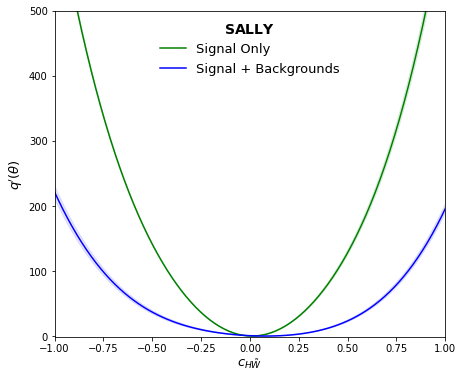

In [63]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{SALLY} $",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## SALLY Signal Only vs Signal + backgrounds - zoom in

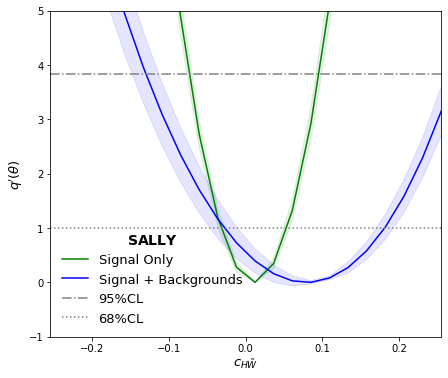

In [64]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{SALLY}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

## SALLY Signal Only vs Signal + backgrounds - angular observables

(-1.0, 1.0)

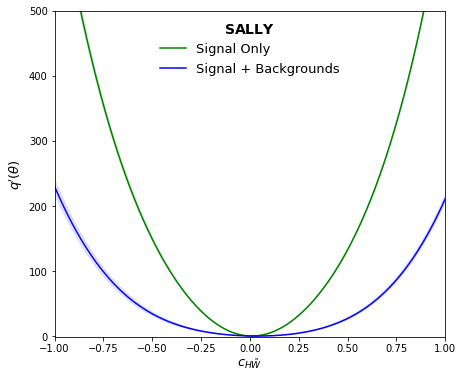

In [66]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{SALLY} $",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## SALLY Signal Only vs Signal + backgrounds - angular observables zoom in

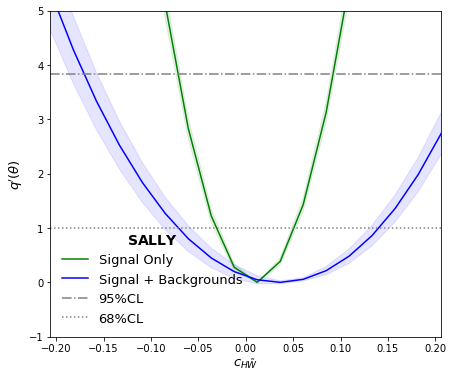

In [67]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{SALLY}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

## ALICES kinematic only vs angular observables signal only

(-1.0, 1.0)

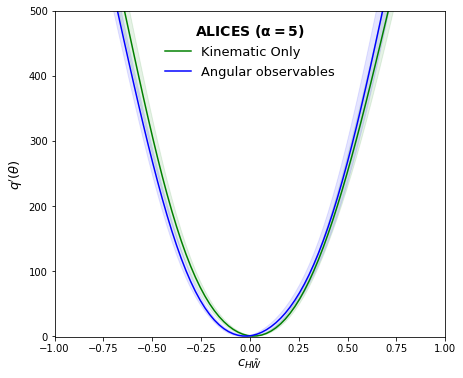

In [74]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## ALICES kinematic only vs angular observables signal only zoom in

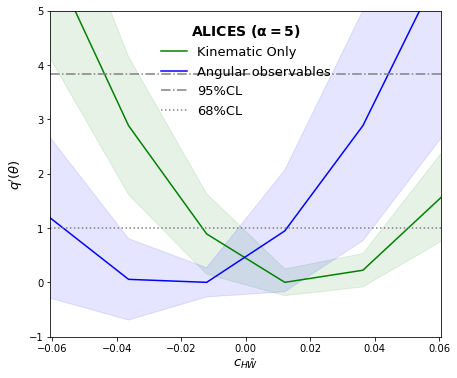

In [77]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)


## ALICES kinematic only vs angular observables signal and backgrounds

(-1.0, 1.0)

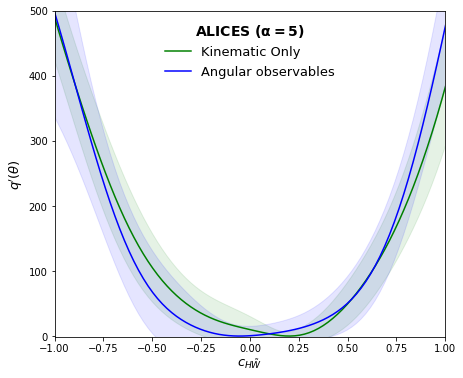

In [79]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## ALICES kinematic only vs angular observables signal and backgrounds - zoom in

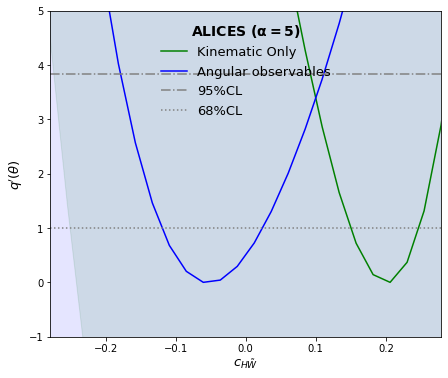

In [101]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

## ALICE kinematic only vs angular observables signal and backgrounds 

(-1.0, 1.0)

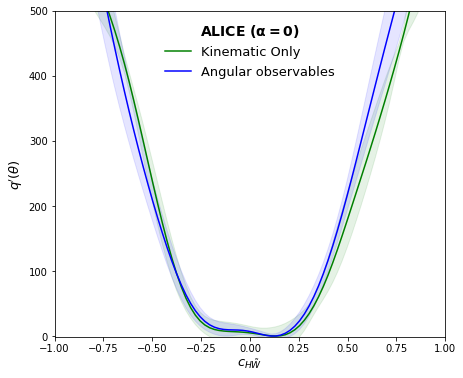

In [102]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/all_observables_remove_redundant_cos/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_5000000_samples/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## ALICE kinematic only vs angular observables signal and backgrounds  - zoom in

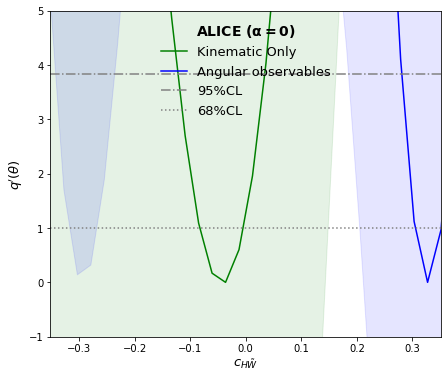

In [89]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

## ALICE kinematic only vs angular observables signal and backgrounds 

(-1.0, 1.0)

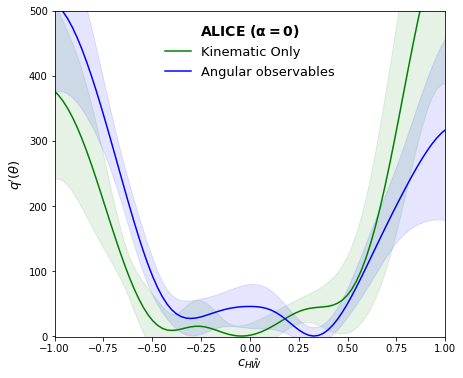

In [83]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## ALICE kinematic only vs angular observables signal and backgrounds - zoom in

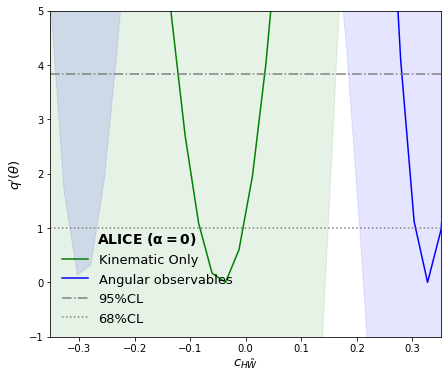

In [85]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/all_observables_remove_redundant_cos/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_0.4_10000_thetas_10e7_samples/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

## SALLY kinematic only vs angular observables signal only

(-1.0, 1.0)

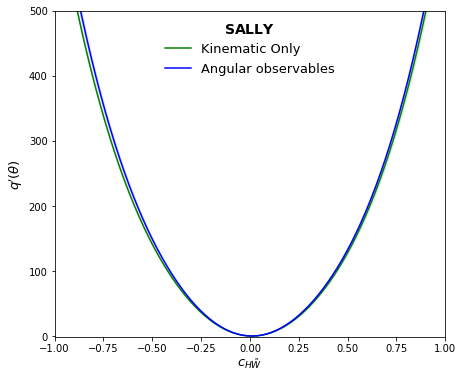

In [95]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{SALLY}$ ",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## SALLY kinematic only vs angular observables signal only - zoom in 

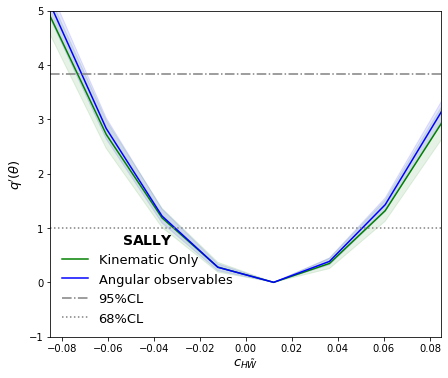

In [97]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{SALLY}$ ",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

## SALLY kinematic only vs angular observables signal and backgrounds

(-1.0, 1.0)

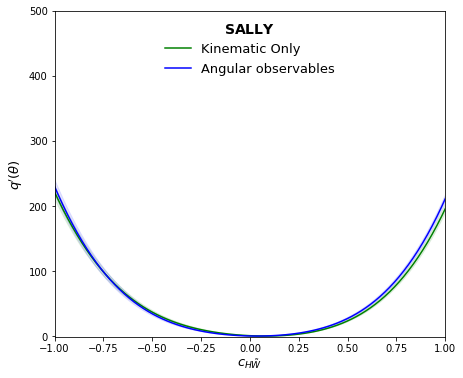

In [99]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{SALLY}$ ",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## SALLY kinematic only vs angular observables  signal and backgrounds - zoom in 

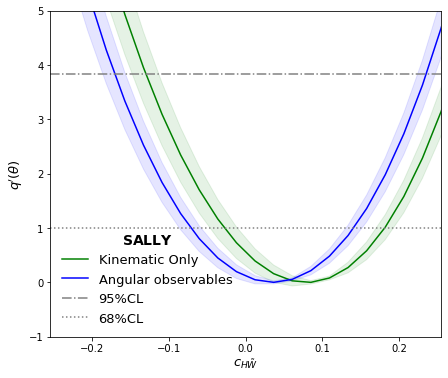

In [100]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/all_observables_remove_redundant_cos/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds/range_[-1.2, 1.2]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Kinematic Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Angular observables")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 

parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{SALLY}$ ",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

# Detector-level with Pythia and Delphes: CP-even

## Alices Signal Only vs Signal + backgrounds 

(-1.0, 1.0)

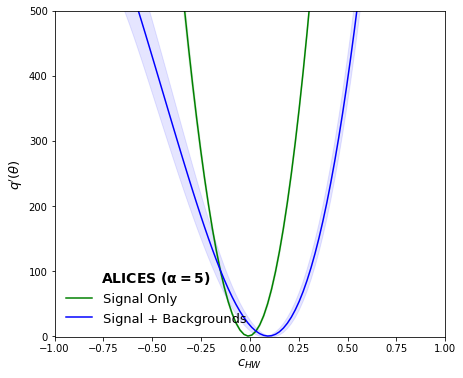

In [53]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## Alices Signal Only vs Signal + backgrounds zoom in

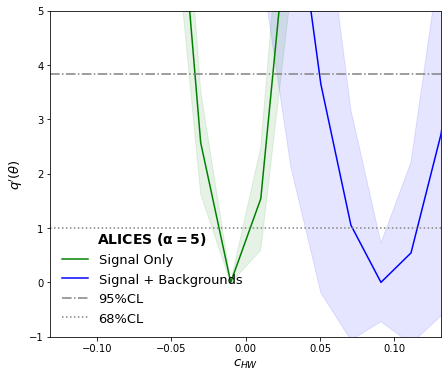

In [51]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICES}$ $\bf{(\alpha = 5)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


## Alice Signal Only vs Signal + backgrounds 

(-1.0, 1.0)

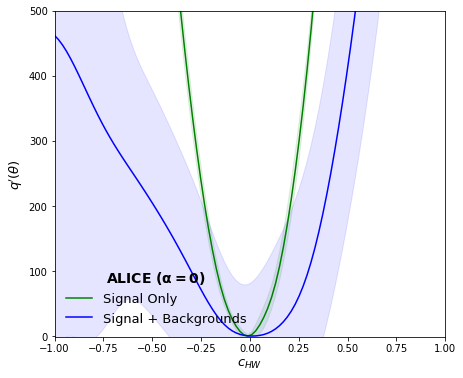

In [14]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## Alices Signal Only vs Signal + backgrounds zoom in

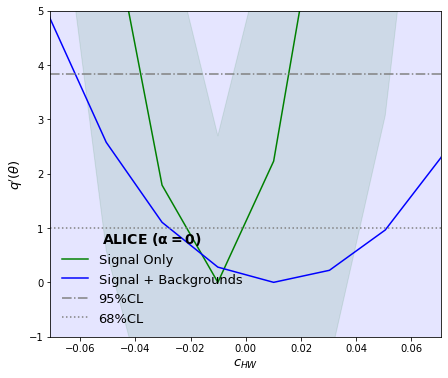

In [69]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{ALICE}$ $\bf{(\alpha = 0)}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

## SALLY Signal Only vs Signal + backgrounds 

(-1.0, 1.0)

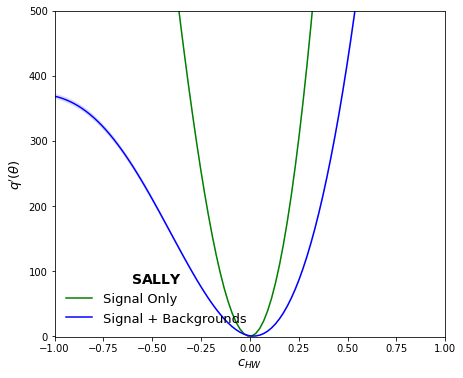

In [91]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{SALLY}$ ",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

## SALLY Signal Only vs Signal + backgrounds - zoom in

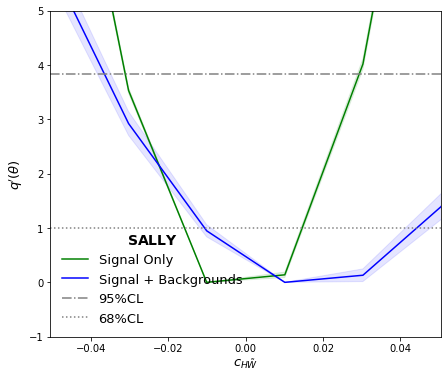

In [92]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)



plt.plot(parameter_grid_S ,rescaled_log_r_S ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)

plt.plot(parameter_grid_SB ,rescaled_log_r_SB ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB , rescaled_log_r_SB  - std_SB , rescaled_log_r_SB  + std_SB, color="blue", alpha=0.1)


plt.xlabel(r"$c_{H\tildeW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 


parameter_points_to_plot_S=[parameter_grid_S[i] for i,llr_val in enumerate(rescaled_log_r_S) if llr_val<3.28]
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)
plt.ylim(-1, 5)
plt.legend(title = r"$\bf{SALLY}$",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)

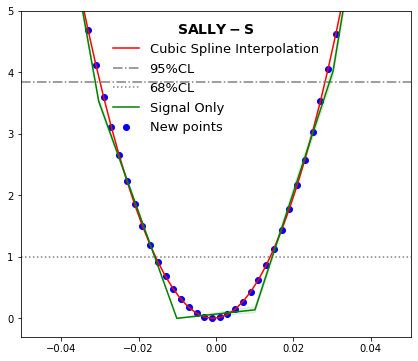

(-0.0007381985383209201, array([-0.39643582]))

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize


load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)


# Perform cubic spline interpolation
interpolation_function = interp1d(parameter_grid_S,rescaled_log_r_S, kind='cubic')

# Generate new theta values for smooth curve
theta_new = np.linspace(-1.0, 1.0, 1000)
llr_new = interpolation_function(theta_new)

# Find the minimum of the interpolated LLR function
result = minimize(interpolation_function, 0.0, bounds=[(-1.0, 1.0)])
theta_min = result.x[0]
llr_min = result.fun

# Plot the data and the interpolated curve
plt.scatter(theta_new, llr_new-llr_min, color='blue', label='New points')
plt.plot(theta_new, llr_new-llr_min, color='red', label='Cubic Spline Interpolation')

# Plot the minimum point
# plt.plot(theta_min, llr_min, 'ko', label=f'Minimum: ({theta_min:.3f}, {llr_min:.3f})')


plt.legend()
plt.ylim(-0.3, 5)
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)


plt.plot(parameter_grid_S ,rescaled_log_r_S,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)
plt.legend(title = r"$\bf{SALLY} - S$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.show()

theta_min, llr_min


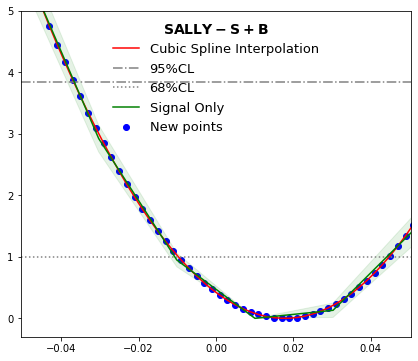

(0.017847180426808374, array([-0.08028244]))

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize


load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)


# Perform cubic spline interpolation
interpolation_function = interp1d(parameter_grid_S,rescaled_log_r_S, kind='cubic')

# Generate new theta values for smooth curve
theta_new = np.linspace(-1.0, 1.0, 1000)
llr_new = interpolation_function(theta_new)

# Find the minimum of the interpolated LLR function
result = minimize(interpolation_function, 0.0, bounds=[(-1.0, 1.0)])
theta_min = result.x[0]
llr_min = result.fun

# Plot the data and the interpolated curve
plt.scatter(theta_new, llr_new-llr_min, color='blue', label='New points')
plt.plot(theta_new, llr_new-llr_min, color='red', label='Cubic Spline Interpolation')

# Plot the minimum point
# plt.plot(theta_min, llr_min, 'ko', label=f'Minimum: ({theta_min:.3f}, {llr_min:.3f})')


plt.legend()
plt.ylim(-0.3, 5)
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)


plt.plot(parameter_grid_S ,rescaled_log_r_S,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)
plt.legend(title = r"$\bf{SALLY} - S+B$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.show()

theta_min, llr_min


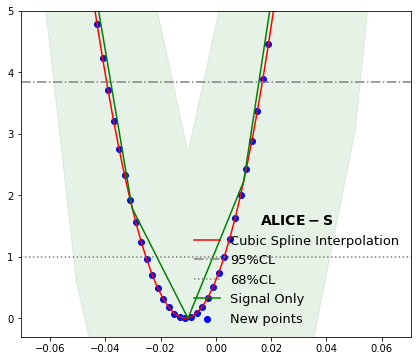

(-0.011065751325057374, array([-0.00473358]))

In [55]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize


data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)


# Perform cubic spline interpolation
interpolation_function = interp1d(parameter_grid_S,rescaled_log_r_S, kind='cubic')

# Generate new theta values for smooth curve
theta_new = np.linspace(-1.0, 1.0, 1000)
llr_new = interpolation_function(theta_new)

# Find the minimum of the interpolated LLR function
result = minimize(interpolation_function, 0.0, bounds=[(-1.0, 1.0)])
theta_min = result.x[0]
llr_min = result.fun

# Plot the data and the interpolated curve
plt.scatter(theta_new, llr_new-llr_min, color='blue', label='New points')
plt.plot(theta_new, llr_new-llr_min, color='red', label='Cubic Spline Interpolation')

# Plot the minimum point
# plt.plot(theta_min, llr_min, 'ko', label=f'Minimum: ({theta_min:.3f}, {llr_min:.3f})')


plt.legend()
plt.ylim(-0.3, 5)
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)


plt.plot(parameter_grid_S ,rescaled_log_r_S,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)
plt.legend(title = r"$\bf{ALICE} - S$",
    title_fontsize=14,frameon = False, loc = "lower right", fontsize = 13)

plt.show()

theta_min, llr_min


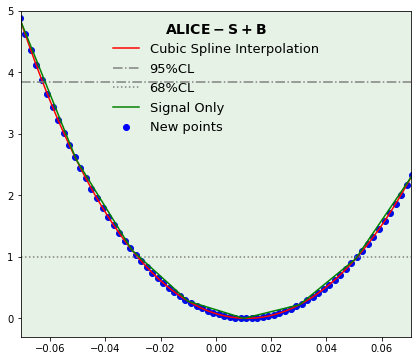

(0.011219815703581796, array([-0.00075366]))

In [58]:
load_dir_SB = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S =  "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize


data_SB = np.load(f"{load_dir_SB}/ensemble_data.npz")
data_S = np.load(f"{load_dir_S}/ensemble_data.npz")

parameter_grid_SB  = data_SB ['parameter_grid']
llr_kin_SB  = data_SB ['llr_kin']
llr_rate_SB  = data_SB ['llr_rate']
index_best_point_SB  = data_SB ['index_best_point']

parameter_grid_S  = data_S ['parameter_grid']
llr_kin_S  = data_S ['llr_kin']
llr_rate_S  = data_S ['llr_rate']
index_best_point_S  = data_S ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB  = llr_kin_SB +llr_rate_SB 
rescaled_log_r_SB  = -2.0*(rescaled_log_r_SB[:] - rescaled_log_r_SB[index_best_point_SB])    
rescaled_log_r_S  = llr_kin_S +llr_rate_S
rescaled_log_r_S  = -2.0*(rescaled_log_r_S[:] - rescaled_log_r_S[index_best_point_S])  

std_SB  = calculate_std(load_dir_SB)
std_SB  = np.squeeze(std_SB)
parameter_grid_SB  = np.squeeze(parameter_grid_SB)
std_S  = calculate_std(load_dir_S)
std_S  = np.squeeze(std_S)
parameter_grid_S = np.squeeze(parameter_grid_S)


# Perform cubic spline interpolation
interpolation_function = interp1d(parameter_grid_S,rescaled_log_r_S, kind='cubic')

# Generate new theta values for smooth curve
theta_new = np.linspace(-1.0, 1.0, 1000)
llr_new = interpolation_function(theta_new)

# Find the minimum of the interpolated LLR function
result = minimize(interpolation_function, 0.0, bounds=[(-1.0, 1.0)])
theta_min = result.x[0]
llr_min = result.fun

# Plot the data and the interpolated curve
plt.scatter(theta_new, llr_new-llr_min, color='blue', label='New points')
plt.plot(theta_new, llr_new-llr_min, color='red', label='Cubic Spline Interpolation')

# Plot the minimum point
# plt.plot(theta_min, llr_min, 'ko', label=f'Minimum: ({theta_min:.3f}, {llr_min:.3f})')


plt.legend()
plt.ylim(-0.3, 5)
parameter_points_to_plot_SB=[parameter_grid_SB[i] for i,llr_val in enumerate(rescaled_log_r_SB) if llr_val<3.28]
max_S = max(abs(parameter_points_to_plot_S[0]),abs(parameter_points_to_plot_S[-1]))
max_SB = max(abs(parameter_points_to_plot_SB[0]),abs(parameter_points_to_plot_SB[-1]))

maxi = max(max_S, max_SB)

plt.axhline(y=3.84,lw = 1.5, linestyle='-.',color='grey',label='95%CL')
plt.axhline(y=1.0,lw=1.5, linestyle=':',color='grey',label='68%CL')
plt.xlim(-maxi,+maxi)


plt.plot(parameter_grid_S ,rescaled_log_r_S,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S , rescaled_log_r_S  - std_S , rescaled_log_r_S  + std_S, color="green", alpha=0.1)
plt.legend(title = r"$\bf{ALICE} - S+B$",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.show()

theta_min, llr_min

(-1.0, 1.0)

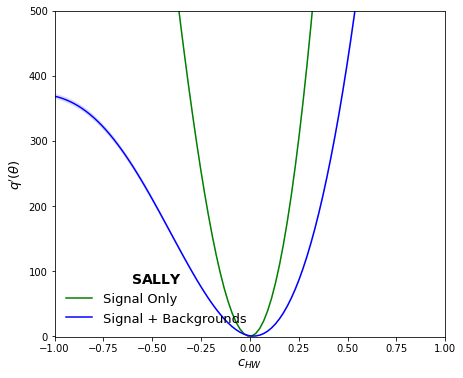

In [61]:
load_dir_SB_sally = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S_sally = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/sally/kinematic_only/sally_hidden_[50]_relu_epochs_50_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB_sally = np.load(f"{load_dir_SB_sally}/ensemble_data.npz")
data_S_sally= np.load(f"{load_dir_S_sally}/ensemble_data.npz")

parameter_grid_SB_sally  = data_SB_sally ['parameter_grid']
llr_kin_SB_sally  = data_SB_sally ['llr_kin']
llr_rate_SB_sally  = data_SB_sally ['llr_rate']
index_best_point_SB_sally  = data_SB_sally ['index_best_point']

parameter_grid_S_sally  = data_S_sally ['parameter_grid']
llr_kin_S_sally  = data_S_sally ['llr_kin']
llr_rate_S_sally  = data_S_sally ['llr_rate']
index_best_point_S_sally  = data_S_sally ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB_sally  = llr_kin_SB_sally +llr_rate_SB_sally 
rescaled_log_r_SB_sally  = -2.0*(rescaled_log_r_SB_sally[:] - rescaled_log_r_SB_sally[index_best_point_SB_sally])    
rescaled_log_r_S_sally  = llr_kin_S_sally +llr_rate_S_sally
rescaled_log_r_S_sally  = -2.0*(rescaled_log_r_S_sally[:] - rescaled_log_r_S_sally[index_best_point_S_sally])  

std_SB_sally  = calculate_std(load_dir_SB_sally)
std_SB_sally  = np.squeeze(std_SB_sally)
parameter_grid_SB_sally  = np.squeeze(parameter_grid_SB_sally)
std_S_sally  = calculate_std(load_dir_S_sally)
std_S_sally  = np.squeeze(std_S_sally)
parameter_grid_S_sally = np.squeeze(parameter_grid_S_sally)



plt.plot(parameter_grid_S_sally ,rescaled_log_r_S_sally ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S_sally , rescaled_log_r_S_sally  - std_S_sally , rescaled_log_r_S_sally  + std_S_sally, color="green", alpha=0.1)

plt.plot(parameter_grid_SB_sally ,rescaled_log_r_SB_sally ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB_sally , rescaled_log_r_SB_sally  - std_SB_sally , rescaled_log_r_SB_sally  + std_SB_sally, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{SALLY}$ ",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

(-1.0, 1.0)

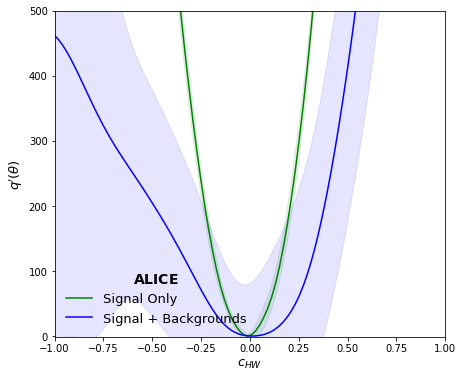

In [62]:
load_dir_SB_alice = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_0_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S_alice = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_0_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB_alice = np.load(f"{load_dir_SB_alice}/ensemble_data.npz")
data_S_alice= np.load(f"{load_dir_S_alice}/ensemble_data.npz")

parameter_grid_SB_alice  = data_SB_alice ['parameter_grid']
llr_kin_SB_alice  = data_SB_alice ['llr_kin']
llr_rate_SB_alice  = data_SB_alice ['llr_rate']
index_best_point_SB_alice  = data_SB_alice ['index_best_point']

parameter_grid_S_alice  = data_S_alice ['parameter_grid']
llr_kin_S_alice  = data_S_alice ['llr_kin']
llr_rate_S_alice  = data_S_alice ['llr_rate']
index_best_point_S_alice  = data_S_alice ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB_alice  = llr_kin_SB_alice +llr_rate_SB_alice 
rescaled_log_r_SB_alice  = -2.0*(rescaled_log_r_SB_alice[:] - rescaled_log_r_SB_alice[index_best_point_SB_alice])    
rescaled_log_r_S_alice  = llr_kin_S_alice +llr_rate_S_alice
rescaled_log_r_S_alice  = -2.0*(rescaled_log_r_S_alice[:] - rescaled_log_r_S_alice[index_best_point_S_alice])  

std_SB_alice  = calculate_std(load_dir_SB_alice)
std_SB_alice  = np.squeeze(std_SB_alice)
parameter_grid_SB_alice  = np.squeeze(parameter_grid_SB_alice)
std_S_alice  = calculate_std(load_dir_S_alice)
std_S_alice  = np.squeeze(std_S_alice)
parameter_grid_S_alice = np.squeeze(parameter_grid_S_alice)



plt.plot(parameter_grid_S_alice ,rescaled_log_r_S_alice ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S_alice , rescaled_log_r_S_alice  - std_S_alice , rescaled_log_r_S_alice  + std_S_alice, color="green", alpha=0.1)

plt.plot(parameter_grid_SB_alice ,rescaled_log_r_SB_alice ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB_alice , rescaled_log_r_SB_alice  - std_SB_alice , rescaled_log_r_SB_alice  + std_SB_alice, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICE}$ ",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

(-1.0, 1.0)

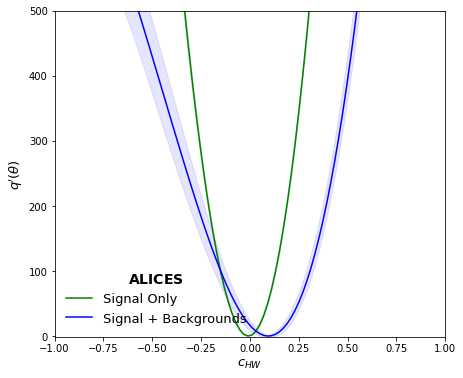

In [70]:
load_dir_SB_alices = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_10e7_samples_CP_even/kinematic_only/alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128/wh_signalWithBSMAndBackgrounds_CP_even/range_[-1.0, 1.0]_resolutions_100"
load_dir_S_alices = "/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/llr_fits/alices_gaussian_prior_0_03_10000_thetas_5000000_samples_CP_even/kinematic_only/alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128/wh_signalWithBSM_CP_even/range_[-1.0, 1.0]_resolutions_100"

data_SB_alices = np.load(f"{load_dir_SB_alices}/ensemble_data.npz")
data_S_alices= np.load(f"{load_dir_S_alices}/ensemble_data.npz")

parameter_grid_SB_alices  = data_SB_alices ['parameter_grid']
llr_kin_SB_alices  = data_SB_alices ['llr_kin']
llr_rate_SB_alices  = data_SB_alices ['llr_rate']
index_best_point_SB_alices  = data_SB_alices ['index_best_point']

parameter_grid_S_alices  = data_S_alices ['parameter_grid']
llr_kin_S_alices  = data_S_alices ['llr_kin']
llr_rate_S_alices  = data_S_alices ['llr_rate']
index_best_point_S_alices  = data_S_alices ['index_best_point']

plt.figure(figsize=(7, 6))

rescaled_log_r_SB_alices  = llr_kin_SB_alices +llr_rate_SB_alices 
rescaled_log_r_SB_alices  = -2.0*(rescaled_log_r_SB_alices[:] - rescaled_log_r_SB_alices[index_best_point_SB_alices])    
rescaled_log_r_S_alices  = llr_kin_S_alices +llr_rate_S_alices
rescaled_log_r_S_alices  = -2.0*(rescaled_log_r_S_alices[:] - rescaled_log_r_S_alices[index_best_point_S_alices])  

std_SB_alices  = calculate_std(load_dir_SB_alices)
std_SB_alices  = np.squeeze(std_SB_alices)
parameter_grid_SB_alices  = np.squeeze(parameter_grid_SB_alices)
std_S_alices  = calculate_std(load_dir_S_alices)
std_S_alices  = np.squeeze(std_S_alices)
parameter_grid_S_alices = np.squeeze(parameter_grid_S_alices)



plt.plot(parameter_grid_S_alices ,rescaled_log_r_S_alices ,lw=1.5, color = "green", label = "Signal Only")    
plt.fill_between(parameter_grid_S_alices , rescaled_log_r_S_alices  - std_S_alices , rescaled_log_r_S_alices  + std_S_alices, color="green", alpha=0.1)

plt.plot(parameter_grid_SB_alices ,rescaled_log_r_SB_alices ,lw=1.5, color = "blue", label = "Signal + Backgrounds")    
plt.fill_between(parameter_grid_SB_alices , rescaled_log_r_SB_alices  - std_SB_alices , rescaled_log_r_SB_alices  + std_SB_alices, color="blue", alpha=0.1)


plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{ALICES}$ ",
    title_fontsize=14,frameon = False, loc = "lower left", fontsize = 13)


plt.ylim(-1,500)
plt.xlim(-1.0,1.0)

(-1.0, 1.0)

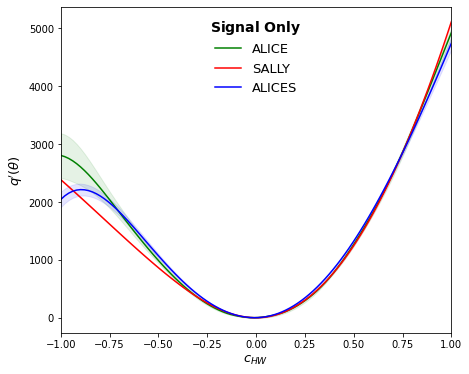

In [98]:
plt.figure(figsize=(7, 6))

plt.plot(parameter_grid_S_alice ,rescaled_log_r_S_alice ,lw=1.5, color = "green", label = "ALICE")    
plt.fill_between(parameter_grid_S_alice , rescaled_log_r_S_alice  - std_S_alice , rescaled_log_r_S_alice  + std_S_alice, color="green", alpha=0.1)


plt.plot(parameter_grid_S_sally ,rescaled_log_r_S_sally ,lw=1.5, color = "red", label = "SALLY")    
plt.fill_between(parameter_grid_S_sally , rescaled_log_r_S_sally  - std_S_sally , rescaled_log_r_S_sally  + std_S_sally, color="red", alpha=0.1)


plt.plot(parameter_grid_S_alices ,rescaled_log_r_S_alices ,lw=1.5, color = "blue", label = "ALICES")    
plt.fill_between(parameter_grid_S_alices , rescaled_log_r_S_alices  - std_S_alices , rescaled_log_r_S_alices  + std_S_alices, color="blue", alpha=0.1)

plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{Signal \ Only}$ ",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)


plt.xlim(-1.0,1.0)


(0.0, 30.0)

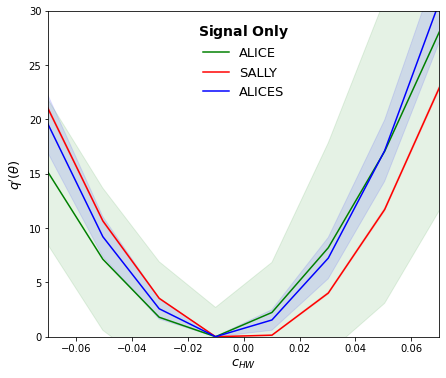

In [97]:
plt.figure(figsize=(7, 6))

plt.plot(parameter_grid_S_alice ,rescaled_log_r_S_alice ,lw=1.5, color = "green", label = "ALICE")    
plt.fill_between(parameter_grid_S_alice , rescaled_log_r_S_alice  - std_S_alice , rescaled_log_r_S_alice  + std_S_alice, color="green", alpha=0.1)


plt.plot(parameter_grid_S_sally ,rescaled_log_r_S_sally ,lw=1.5, color = "red", label = "SALLY")    
plt.fill_between(parameter_grid_S_sally , rescaled_log_r_S_sally  - std_S_sally , rescaled_log_r_S_sally  + std_S_sally, color="red", alpha=0.1)


plt.plot(parameter_grid_S_alices ,rescaled_log_r_S_alices ,lw=1.5, color = "blue", label = "ALICES")    
plt.fill_between(parameter_grid_S_alices , rescaled_log_r_S_alices  - std_S_alices , rescaled_log_r_S_alices  + std_S_alices, color="blue", alpha=0.1)

plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{Signal\ Only}$ ",
    title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)


plt.xlim(-0.07,0.07)
plt.ylim(0,30)


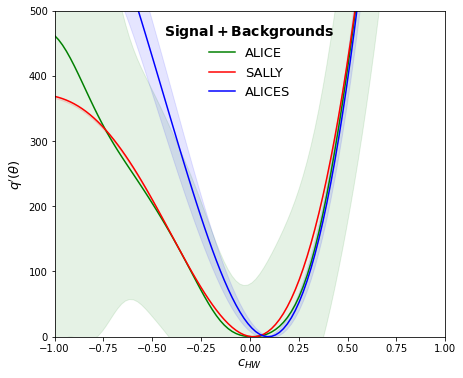

In [86]:
plt.figure(figsize=(7, 6))

plt.plot(parameter_grid_SB_alice ,rescaled_log_r_SB_alice ,lw=1.5, color = "green", label = "ALICE")    
plt.fill_between(parameter_grid_SB_alice , rescaled_log_r_SB_alice  - std_SB_alice , rescaled_log_r_SB_alice  + std_SB_alice, color="green", alpha=0.1)


plt.plot(parameter_grid_SB_sally ,rescaled_log_r_SB_sally ,lw=1.5, color = "red", label = "SALLY")    
plt.fill_between(parameter_grid_SB_sally , rescaled_log_r_SB_sally  - std_SB_sally , rescaled_log_r_SB_sally, color="red", alpha=0.1)


plt.plot(parameter_grid_SB_alices ,rescaled_log_r_SB_alices ,lw=1.5, color = "blue", label = "ALICES")    
plt.fill_between(parameter_grid_SB_alices , rescaled_log_r_SB_alices  - std_SB_alices , rescaled_log_r_SB_alices  + std_SB_alices, color="blue", alpha=0.1)
plt.ylim(0,500)
plt.xlim(-1.0,1.0)
plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{Signal + Backgrounds}$ ",title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)



(0.0, 30.0)

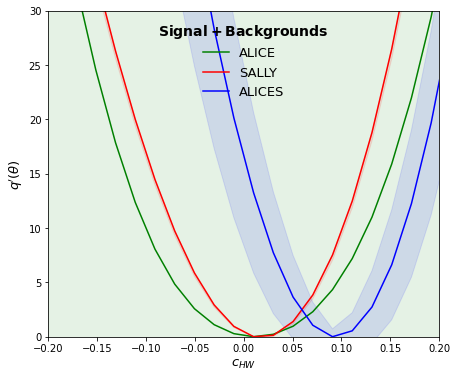

In [96]:
plt.figure(figsize=(7, 6))

plt.plot(parameter_grid_SB_alice ,rescaled_log_r_SB_alice ,lw=1.5, color = "green", label = "ALICE")    
plt.fill_between(parameter_grid_SB_alice , rescaled_log_r_SB_alice  - std_SB_alice , rescaled_log_r_SB_alice  + std_SB_alice, color="green", alpha=0.1)


plt.plot(parameter_grid_SB_sally ,rescaled_log_r_SB_sally ,lw=1.5, color = "red", label = "SALLY")    
plt.fill_between(parameter_grid_SB_sally , rescaled_log_r_SB_sally  - std_SB_sally , rescaled_log_r_SB_sally, color="red", alpha=0.1)


plt.plot(parameter_grid_SB_alices ,rescaled_log_r_SB_alices ,lw=1.5, color = "blue", label = "ALICES")    
plt.fill_between(parameter_grid_SB_alices , rescaled_log_r_SB_alices  - std_SB_alices , rescaled_log_r_SB_alices  + std_SB_alices, color="blue", alpha=0.1)
plt.ylim(0,500)
plt.xlim(-1.0,1.0)
plt.xlabel(r"$c_{HW}$", size=13)
plt.ylabel(r"$q'(\theta)$", size=13) 
plt.legend(title = r"$\bf{Signal + Backgrounds}$ ",title_fontsize=14,frameon = False, loc = "upper center", fontsize = 13)

plt.xlim(-0.2,0.2)
plt.ylim(0,30)